In [7]:
import numpy as np
import pandas as pd

In [9]:
train_df=pd.read_csv('C:/Users/vaish/OneDrive/Desktop/projects/train.csv')
test_df=pd.read_csv('C:/Users/vaish/OneDrive/Desktop/projects/test.csv')
sampleSubmission_df=pd.read_csv('C:/Users/vaish/OneDrive/Desktop/projects/sampleSubmission.csv')

In [11]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
test_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
print(train_df.shape)
print(test_df.shape)

(10886, 12)
(6493, 9)


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [21]:
train_df['date'] = train_df['datetime'].apply(lambda x: x.split()[0])

In [23]:
train_df['year'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train_df['month'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train_df['day'] = train_df['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train_df['hour'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# train_df['minute'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[1])
# train_df['second'] = train_df['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [27]:
from datetime import datetime
import calendar

In [29]:
train_df['weekday'] = train_df['date'].apply(lambda dateString: calendar.day_name[datetime.strptime(dateString, "%Y-%m-%d").weekday()])

In [31]:
train_df['encoded_season'] = train_df['season'].map({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})
train_df['encoded_weather'] = train_df['weather'].map({
    1: 'Clear',
    2: 'Mist, Few clouds',
    3: 'Light Snow, Rain, Thunderstorm',
    4: 'Heavy Rain, Thunderstorm, Snow, Fog'
})

In [33]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday,encoded_season,encoded_weather
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday,Spring,Clear


In [35]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

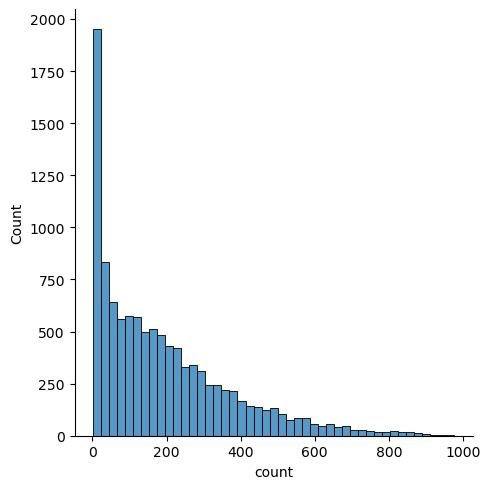

In [37]:
sns.displot(train_df['count'])

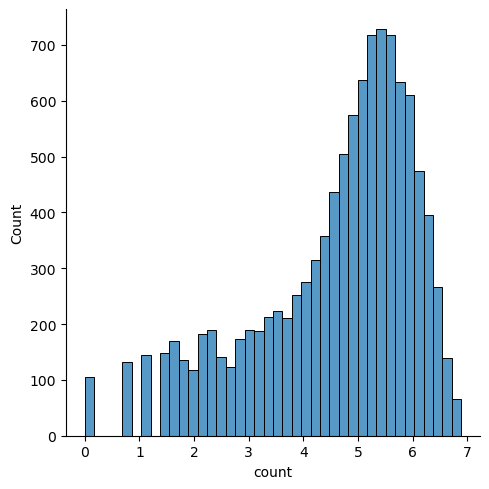

In [39]:
sns.displot(np.log(train_df['count']))

<Axes: xlabel='hour', ylabel='count'>

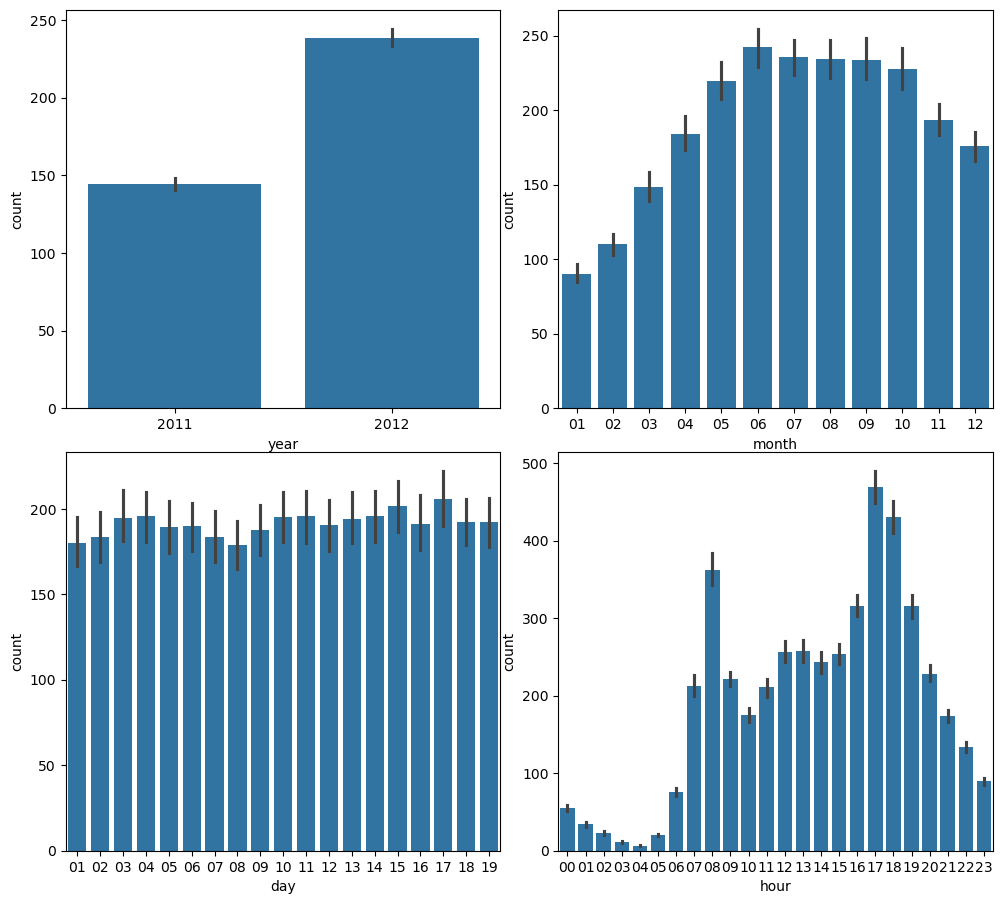

In [47]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10, 9)
plt.tight_layout()

sns.barplot(x='year', y='count', data=train_df, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train_df, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train_df, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train_df, ax=axes[1,1])

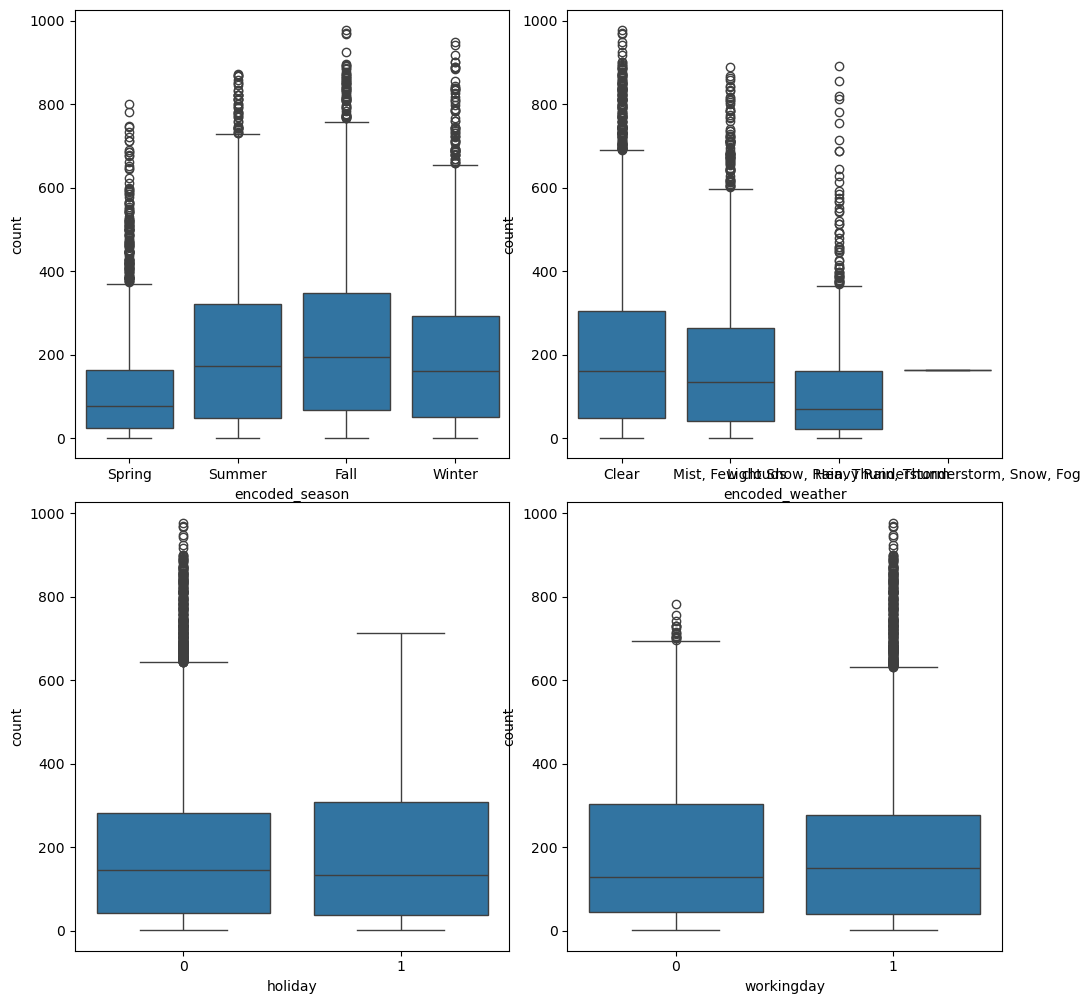

In [51]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(10, 10)
plt.tight_layout()

sns.boxplot(x='encoded_season', y='count', data=train_df, ax=axes[0, 0])
sns.boxplot(x='encoded_weather', y='count', data=train_df, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train_df, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train_df, ax=axes[1,1])
plt.show()

<Axes: xlabel='hour', ylabel='count'>

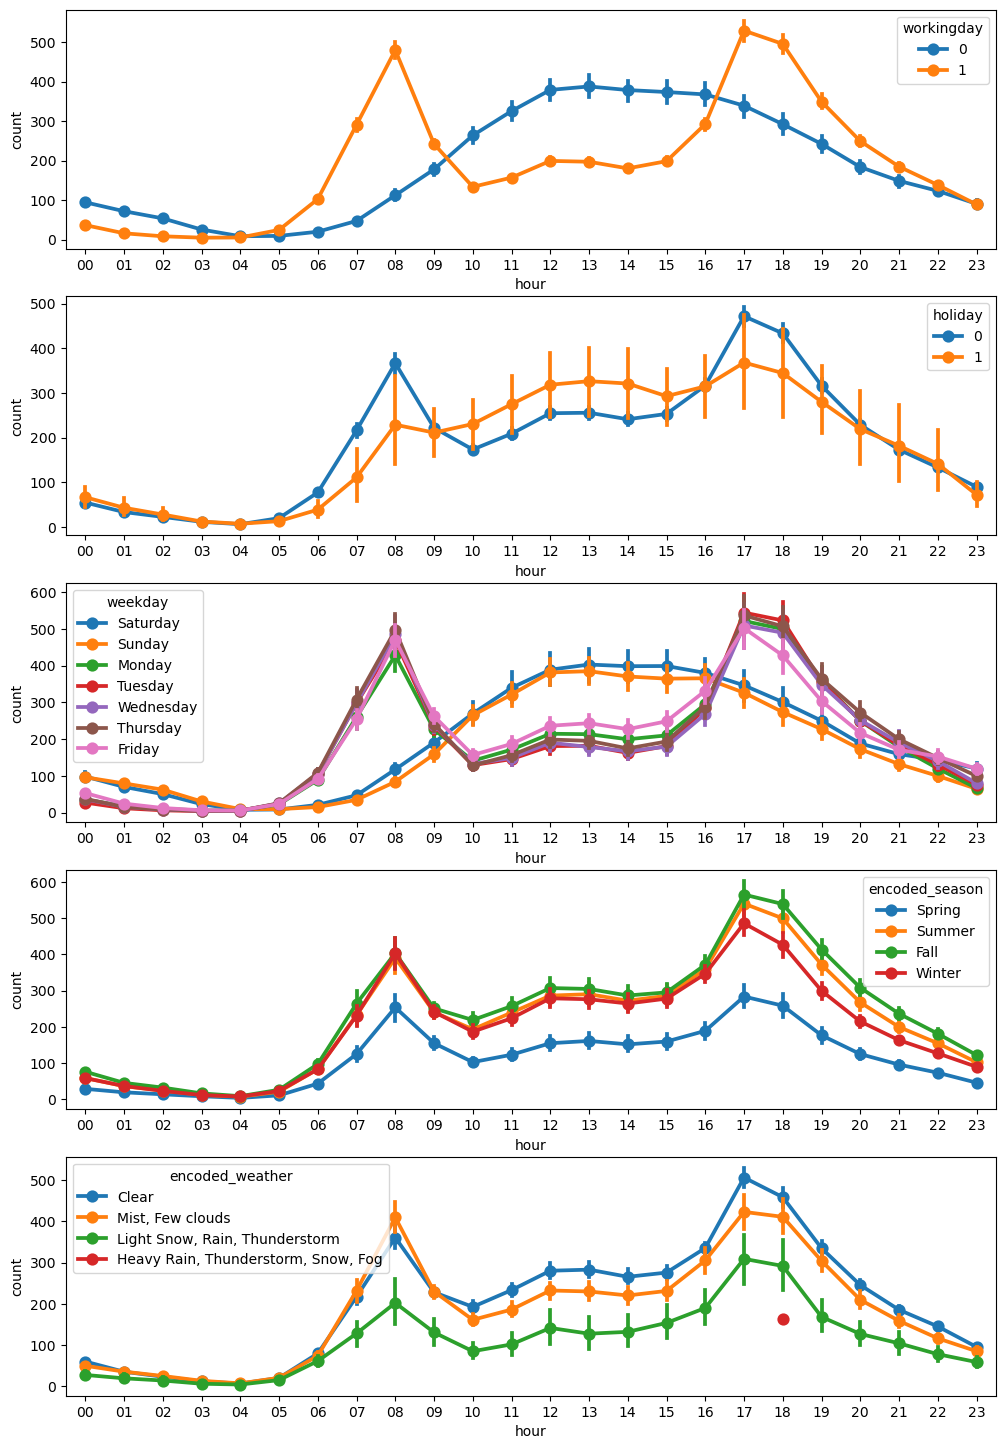

In [53]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train_df, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train_df, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train_df, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train_df, hue='encoded_season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train_df, hue='encoded_weather', ax=axes[4])

<Axes: xlabel='humidity', ylabel='count'>

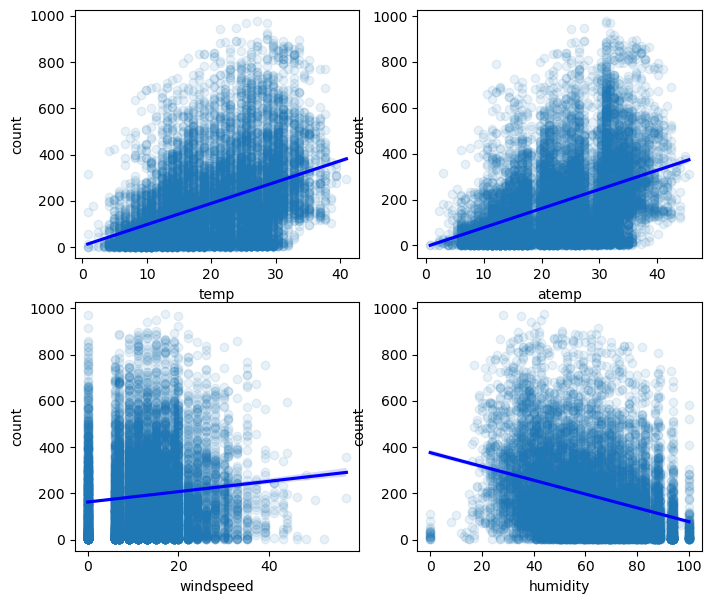

In [57]:
figure, axes = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(7, 6)
plt.tight_layout()

sns.regplot(x='temp', y='count', data=train_df, ax=axes[0, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train_df, ax=axes[0, 1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train_df, ax=axes[1, 0], scatter_kws={'alpha': 0.1}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train_df, ax=axes[1, 1], scatter_kws={'alpha': 0.1}, line_kws={'color':'blue'})


In [61]:
corr = train_df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

<Axes: >

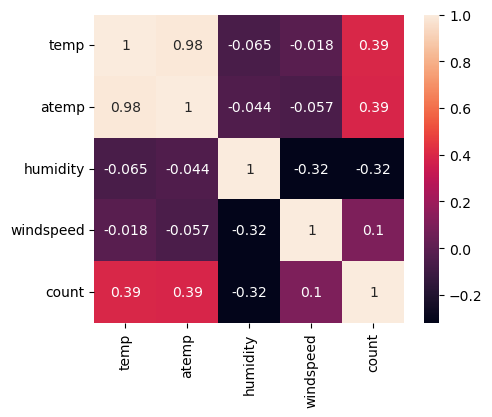

In [65]:
fig, ax = plt.subplots()
fig.set_size_inches(5,4)
sns.heatmap(corr, annot=True)

In [67]:
all_df = pd.concat([train_df, test_df], ignore_index=True)
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday,encoded_season,encoded_weather
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,01,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,01,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,01,02,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,01,01,03,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,01,01,04,Saturday,Spring,Clear


In [69]:
all_df.isnull().sum()

datetime              0
season                0
holiday               0
workingday            0
weather               0
temp                  0
atemp                 0
humidity              0
windspeed             0
casual             6493
registered         6493
count              6493
date               6493
year               6493
month              6493
day                6493
hour               6493
weekday            6493
encoded_season     6493
encoded_weather    6493
dtype: int64

In [71]:
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday,encoded_season,encoded_weather
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,01,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,01,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,01,02,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,01,01,03,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,01,01,04,Saturday,Spring,Clear


In [73]:
all_df['date'] = all_df['datetime'].apply(lambda x: x.split()[0])
all_df['day'] = all_df['datetime'].apply(lambda x: x.split()[0].split('-')[2])
all_df['year'] = all_df['datetime'].apply(lambda x: x.split()[0].split('-')[0])
all_df['month'] = all_df['datetime'].apply(lambda x: x.split()[0].split('-')[1])
all_df['hour'] = all_df['datetime'].apply(lambda x: x.split()[1].split(':')[0])

In [75]:
all_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday,encoded_season,encoded_weather
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,2011,01,01,00,Saturday,Spring,Clear
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,2011,01,01,01,Saturday,Spring,Clear
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2011,01,01,02,Saturday,Spring,Clear
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,2011,01,01,03,Saturday,Spring,Clear
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,2011,01,01,04,Saturday,Spring,Clear


In [77]:
all_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'date', 'year', 'month', 'day', 'hour', 'weekday', 'encoded_season',
       'encoded_weather'],
      dtype='object')

In [81]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month', 'encoded_season', 'encoded_weather', 'weekday']
all_df=all_df.drop(drop_features, axis=1)

In [83]:
all_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,day,hour
0,1,0,0,1,9.84,14.395,81,16.0,2011,01,00
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,01
2,1,0,0,1,9.02,13.635,80,32.0,2011,01,02
3,1,0,0,1,9.84,14.395,75,13.0,2011,01,03
4,1,0,0,1,9.84,14.395,75,1.0,2011,01,04


In [85]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   temp        17379 non-null  float64
 5   atemp       17379 non-null  float64
 6   humidity    17379 non-null  int64  
 7   count       10886 non-null  float64
 8   year        17379 non-null  object 
 9   day         17379 non-null  object 
 10  hour        17379 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 1.5+ MB


In [87]:
all_df.isnull().sum()

season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
count         6493
year             0
day              0
hour             0
dtype: int64

In [89]:
X_train = all_df[~pd.isnull(all_df['count'])]
X_test = all_df[pd.isnull(all_df['count'])]

# remove target value
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y_train = train_df['count']

In [91]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour
0,1,0,0,1,9.84,14.395,81,2011,01,00
1,1,0,0,1,9.02,13.635,80,2011,01,01
2,1,0,0,1,9.02,13.635,80,2011,01,02
3,1,0,0,1,9.84,14.395,75,2011,01,03
4,1,0,0,1,9.84,14.395,75,2011,01,04


In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   year        10886 non-null  object 
 8   day         10886 non-null  object 
 9   hour        10886 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 935.5+ KB


In [104]:
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [115]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [117]:
rf_params = {'random_state': [42], 'n_estimators': [100, 120, 140]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

In [121]:
gridsearch_random_forest_model = GridSearchCV(estimator=model,
                                     param_grid=rf_params,
                                     scoring=rmsle_scorer,
                                     cv=5)

In [127]:
log_y_train = np.log(y_train)
gridsearch_random_forest_model.fit(X_train, log_y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [42]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'))

In [128]:
print(f'Optimized hyperparameter: {gridsearch_random_forest_model.best_params_}')

Optimized hyperparameter: {'n_estimators': 140, 'random_state': 42}


In [129]:
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

In [130]:
print(f'RMSLE: {rmsle(log_y_train, preds, True):.4f}')

RMSLE: 0.1199


In [135]:
X_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,day,hour
10886,1,0,1,1,10.66,11.365,56,2011,20,00
10887,1,0,1,1,10.66,13.635,56,2011,20,01
10888,1,0,1,1,10.66,13.635,56,2011,20,02
10889,1,0,1,1,10.66,12.880,56,2011,20,03
10890,1,0,1,1,10.66,12.880,56,2011,20,04


In [137]:
submission_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

Text(0.5, 1.0, 'Predicted Test Data\xa0Distribution')

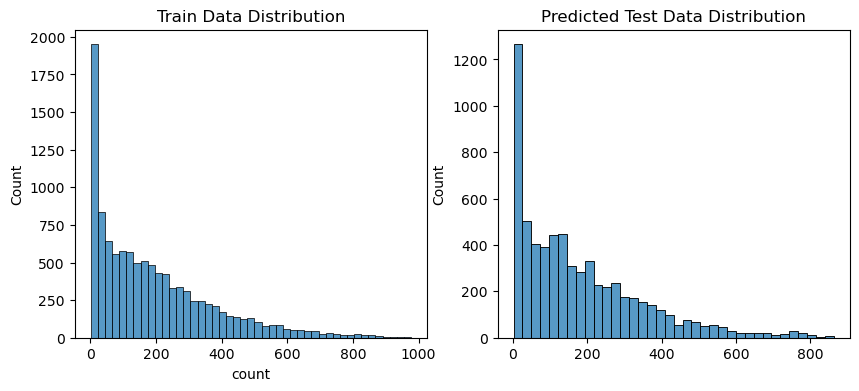

In [139]:
figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y_train, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(submission_preds), ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution')

In [143]:
sampleSubmission_df['count'] = np.exp(submission_preds)
sampleSubmission_df.to_csv('submission.csv', index=False)